In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris, load_breast_cancer
# Load datasets
iris = load_iris()
iris_data = iris.data
iris_target = iris.target

cancer = load_breast_cancer()
cancer_data = cancer.data
cancer_target = cancer.target

In [3]:
# Apply PCA
def apply_pca(data, n_components=2):
    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(data)
    return transformed_data

iris_pca = apply_pca(iris_data)
cancer_pca = apply_pca(cancer_data)

# Apply ICA
def apply_ica(data, n_components=2):
    ica = FastICA(n_components=n_components)
    transformed_data = ica.fit_transform(data)
    return transformed_data

iris_ica = apply_ica(iris_data)
cancer_ica = apply_ica(cancer_data)

# Apply Randomized Projections
def apply_random_proj(data, n_components=2):
    rp = GaussianRandomProjection(n_components=n_components)
    transformed_data = rp.fit_transform(data)
    return transformed_data

iris_rp = apply_random_proj(iris_data)
cancer_rp = apply_random_proj(cancer_data)


In [8]:
# Fit K-Means and EM to the original and reduced datasets
def fit_clusters(data, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    em = GaussianMixture(n_components=n_clusters, random_state=42)

    kmeans_labels = kmeans.fit_predict(data)
    em_labels = em.fit_predict(data)

    return kmeans_labels, em_labels

# Fit clusters to original and reduced datasets
iris_kmeans_labels, iris_em_labels = fit_clusters(iris_data)
cancer_kmeans_labels, cancer_em_labels = fit_clusters(cancer_data,2)

iris_pca_kmeans_labels, iris_pca_em_labels = fit_clusters(iris_pca)
cancer_pca_kmeans_labels, cancer_pca_em_labels = fit_clusters(cancer_pca,2)

iris_ica_kmeans_labels, iris_ica_em_labels = fit_clusters(iris_ica)
cancer_ica_kmeans_labels, cancer_ica_em_labels = fit_clusters(cancer_ica,2)

iris_rp_kmeans_labels, iris_rp_em_labels = fit_clusters(iris_rp)
cancer_rp_kmeans_labels, cancer_rp_em_labels = fit_clusters(cancer_rp,2)


In [9]:
# Calculate silhouette scores for clustering algorithms
def calculate_silhouette_scores(data, kmeans_labels, em_labels):
    kmeans_silhouette = silhouette_score(data, kmeans_labels)
    em_silhouette = silhouette_score(data, em_labels)
    return kmeans_silhouette, em_silhouette

# Silhouette scores for Iris dataset
iris_kmeans_silhouette, iris_em_silhouette = calculate_silhouette_scores(iris_data, iris_kmeans_labels, iris_em_labels)
iris_pca_kmeans_silhouette, iris_pca_em_silhouette = calculate_silhouette_scores(iris_pca, iris_pca_kmeans_labels, iris_pca_em_labels)
iris_ica_kmeans_silhouette, iris_ica_em_silhouette = calculate_silhouette_scores(iris_ica, iris_ica_kmeans_labels, iris_ica_em_labels)
iris_rp_kmeans_silhouette, iris_rp_em_silhouette = calculate_silhouette_scores(iris_rp, iris_rp_kmeans_labels, iris_rp_em_labels)

# Silhouette scores for Breast Cancer dataset
cancer_kmeans_silhouette, cancer_em_silhouette = calculate_silhouette_scores(cancer_data, cancer_kmeans_labels, cancer_em_labels)
cancer_pca_kmeans_silhouette, cancer_pca_em_silhouette = calculate_silhouette_scores(cancer_pca, cancer_pca_kmeans_labels, cancer_pca_em_labels)
cancer_ica_kmeans_silhouette, cancer_ica_em_silhouette = calculate_silhouette_scores(cancer_ica, cancer_ica_kmeans_labels, cancer_ica_em_labels)
cancer_rp_kmeans_silhouette, cancer_rp_em_silhouette = calculate_silhouette_scores(cancer_rp, cancer_rp_kmeans_labels, cancer_rp_em_labels)


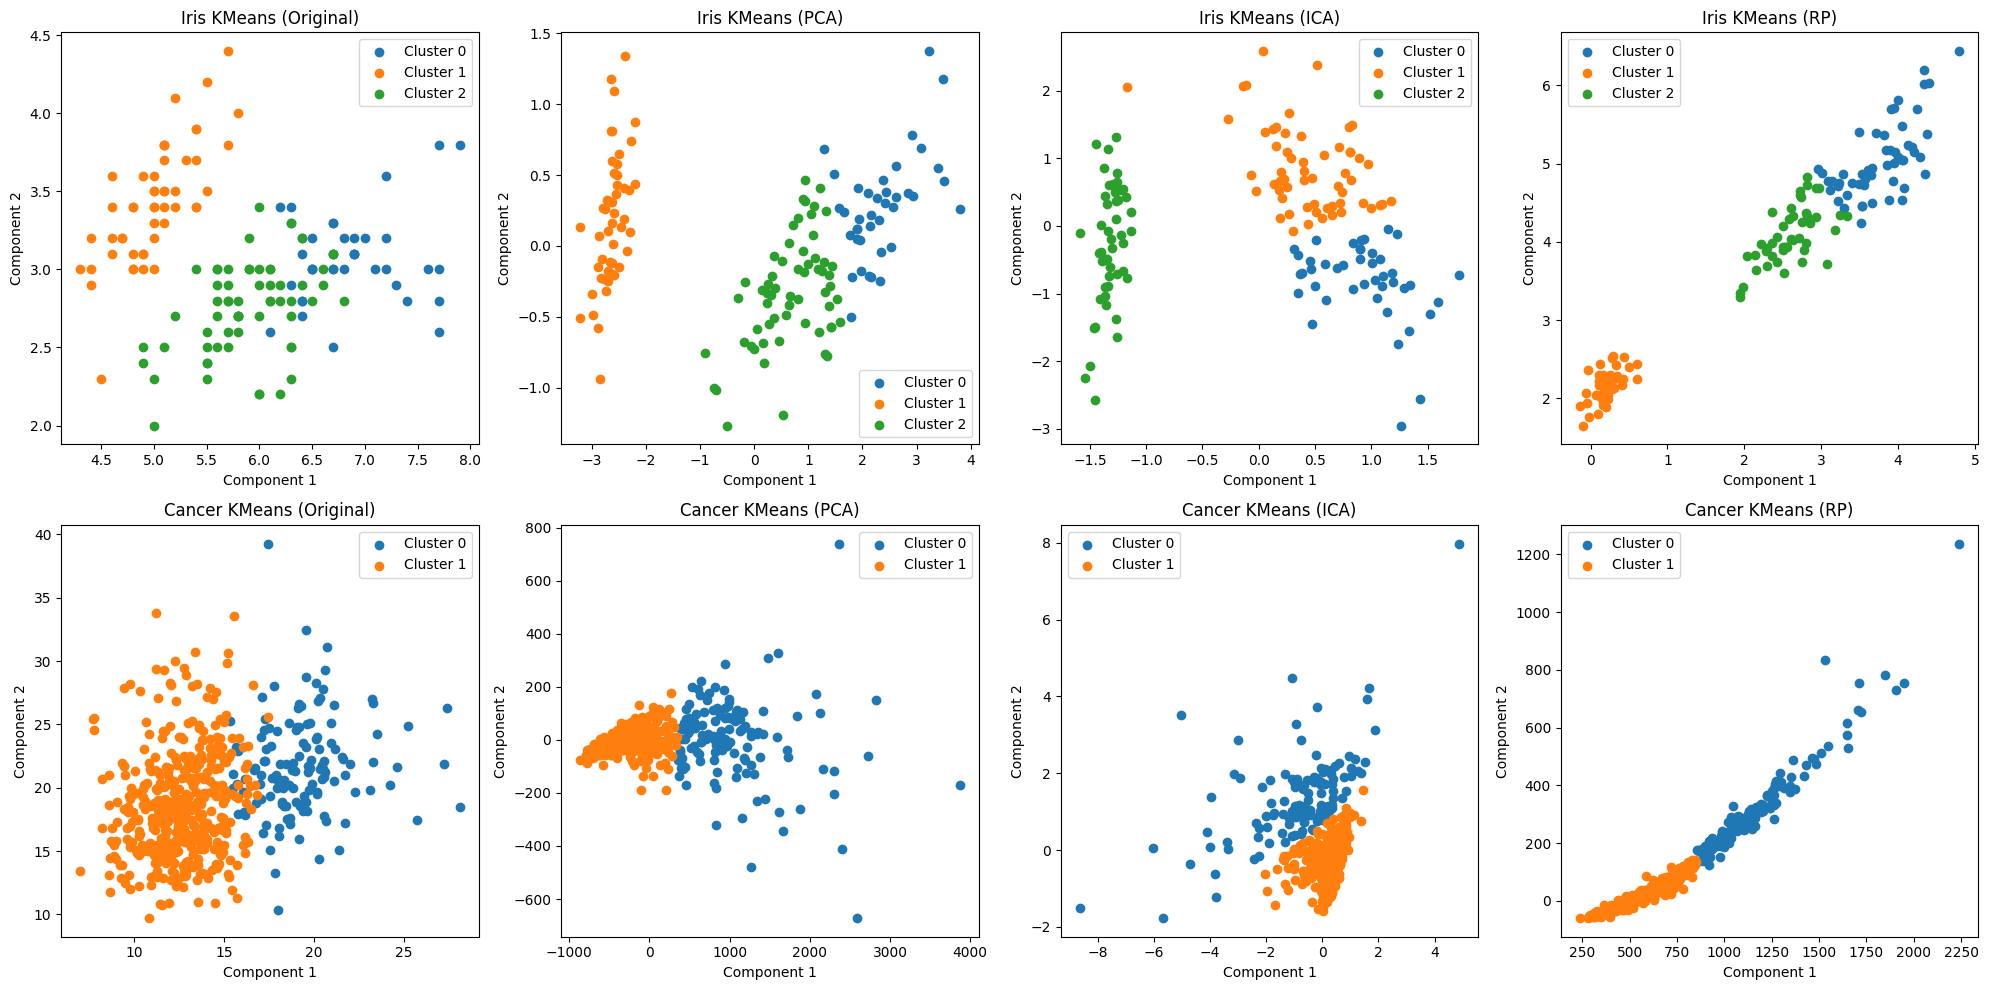

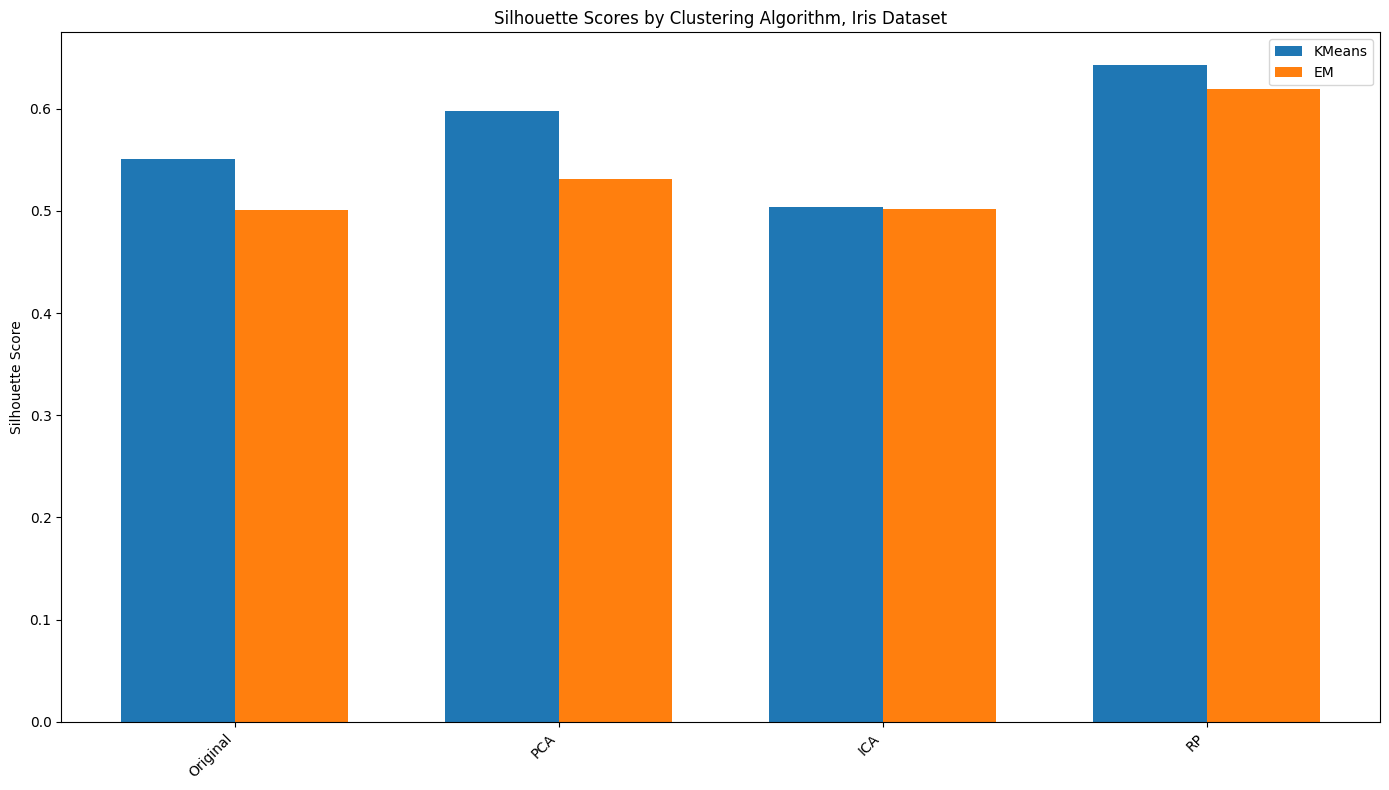

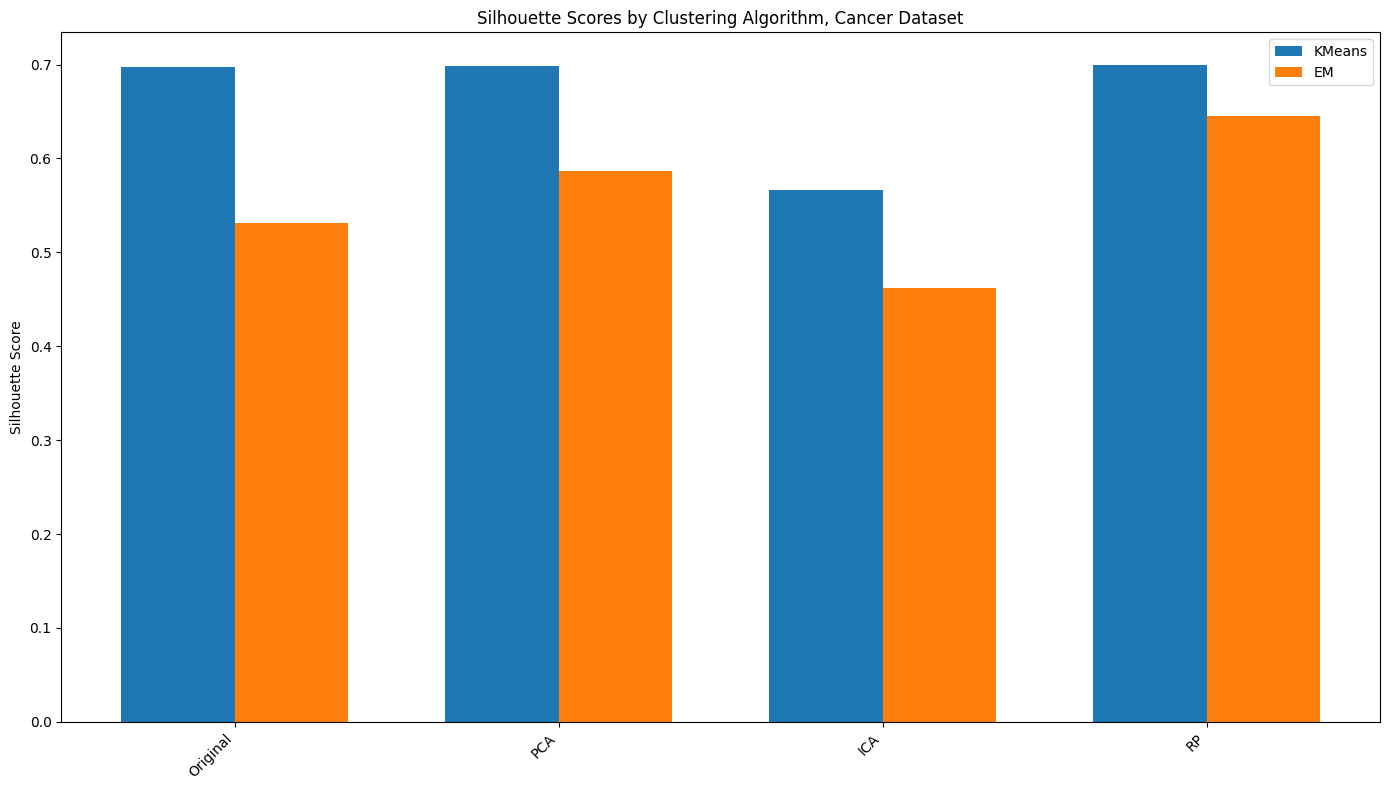

Iris Original - KMeans Silhouette: 0.5512, EM Silhouette: 0.5012
Iris PCA - KMeans Silhouette: 0.5977, EM Silhouette: 0.5313
Iris ICA - KMeans Silhouette: 0.5042, EM Silhouette: 0.5023
Iris RP - KMeans Silhouette: 0.6427, EM Silhouette: 0.6191
Cancer Original - KMeans Silhouette: 0.6973, EM Silhouette: 0.5315
Cancer PCA - KMeans Silhouette: 0.6984, EM Silhouette: 0.5866
Cancer ICA - KMeans Silhouette: 0.5665, EM Silhouette: 0.4618
Cancer RP - KMeans Silhouette: 0.6993, EM Silhouette: 0.6448


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris, load_breast_cancer

# Load datasets
iris = load_iris()
iris_data = iris.data
iris_target = iris.target

cancer = load_breast_cancer()
cancer_data = cancer.data
cancer_target = cancer.target

# Apply dimensionality reduction
def apply_pca(data, n_components=2):
    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(data)
    return transformed_data

def apply_ica(data, n_components=2):
    ica = FastICA(n_components=n_components)
    transformed_data = ica.fit_transform(data)
    return transformed_data

def apply_random_proj(data, n_components=2):
    rp = GaussianRandomProjection(n_components=n_components)
    transformed_data = rp.fit_transform(data)
    return transformed_data

iris_pca = apply_pca(iris_data)
iris_ica = apply_ica(iris_data)
iris_rp = apply_random_proj(iris_data)

cancer_pca = apply_pca(cancer_data)
cancer_ica = apply_ica(cancer_data)
cancer_rp = apply_random_proj(cancer_data)

# Fit K-Means and EM clustering
def fit_clusters(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    em = GaussianMixture(n_components=n_clusters, random_state=42)

    kmeans_labels = kmeans.fit_predict(data)
    em_labels = em.fit_predict(data)

    return kmeans_labels, em_labels

# Fit clusters to original and reduced datasets
datasets = {
    "Iris Original": iris_data,
    "Iris PCA": iris_pca,
    "Iris ICA": iris_ica,
    "Iris RP": iris_rp,
    "Cancer Original": cancer_data,
    "Cancer PCA": cancer_pca,
    "Cancer ICA": cancer_ica,
    "Cancer RP": cancer_rp
}

results = {}

# Define number of clusters for each dataset
n_clusters = {
    "Iris": 3,
    "Cancer": 2
}

for name, data in datasets.items():
    dataset_type = "Iris" if "Iris" in name else "Cancer"
    kmeans_labels, em_labels = fit_clusters(data, n_clusters[dataset_type])
    kmeans_silhouette = silhouette_score(data, kmeans_labels)
    em_silhouette = silhouette_score(data, em_labels)
    results[name] = {
        "KMeans Labels": kmeans_labels,
        "EM Labels": em_labels,
        "KMeans Silhouette": kmeans_silhouette,
        "EM Silhouette": em_silhouette
    }

# Plot clusters for visualization
def plot_clusters(ax, data, labels, title):
    unique_labels = np.unique(labels)
    for label in unique_labels:
        ax.scatter(data[labels == label, 0], data[labels == label, 1], label=f'Cluster {label}')
    ax.set_title(title)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.legend()

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

plot_clusters(axs[0, 0], iris_data, results["Iris Original"]["KMeans Labels"], 'Iris KMeans (Original)')
plot_clusters(axs[0, 1], iris_pca, results["Iris PCA"]["KMeans Labels"], 'Iris KMeans (PCA)')
plot_clusters(axs[0, 2], iris_ica, results["Iris ICA"]["KMeans Labels"], 'Iris KMeans (ICA)')
plot_clusters(axs[0, 3], iris_rp, results["Iris RP"]["KMeans Labels"], 'Iris KMeans (RP)')

plot_clusters(axs[1, 0], cancer_data, results["Cancer Original"]["KMeans Labels"], 'Cancer KMeans (Original)')
plot_clusters(axs[1, 1], cancer_pca, results["Cancer PCA"]["KMeans Labels"], 'Cancer KMeans (PCA)')
plot_clusters(axs[1, 2], cancer_ica, results["Cancer ICA"]["KMeans Labels"], 'Cancer KMeans (ICA)')
plot_clusters(axs[1, 3], cancer_rp, results["Cancer RP"]["KMeans Labels"], 'Cancer KMeans (RP)')

plt.tight_layout()
plt.show()

# Plot silhouette scores for comparison
def plot_silhouette_scores(scores, titles, dataset):
    x = np.arange(len(titles))
    width = 0.35
    fig, ax = plt.subplots(figsize=(14, 8))
    ax.bar(x - width/2, [score[0] for score in scores], width, label='KMeans')
    ax.bar(x + width/2, [score[1] for score in scores], width, label='EM')
    ax.set_ylabel('Silhouette Score')
    ax.set_title(f'Silhouette Scores by Clustering Algorithm, {dataset} Dataset')
    ax.set_xticks(x)
    ax.set_xticklabels(titles, rotation=45, ha="right")
    ax.legend()
    plt.tight_layout()
    plt.show()

# Silhouette scores
iris_scores = [
    (results["Iris Original"]["KMeans Silhouette"], results["Iris Original"]["EM Silhouette"]),
    (results["Iris PCA"]["KMeans Silhouette"], results["Iris PCA"]["EM Silhouette"]),
    (results["Iris ICA"]["KMeans Silhouette"], results["Iris ICA"]["EM Silhouette"]),
    (results["Iris RP"]["KMeans Silhouette"], results["Iris RP"]["EM Silhouette"])
]

cancer_scores = [
    (results["Cancer Original"]["KMeans Silhouette"], results["Cancer Original"]["EM Silhouette"]),
    (results["Cancer PCA"]["KMeans Silhouette"], results["Cancer PCA"]["EM Silhouette"]),
    (results["Cancer ICA"]["KMeans Silhouette"], results["Cancer ICA"]["EM Silhouette"]),
    (results["Cancer RP"]["KMeans Silhouette"], results["Cancer RP"]["EM Silhouette"])
]

plot_silhouette_scores(iris_scores, ['Original', 'PCA', 'ICA', 'RP'], 'Iris')
plot_silhouette_scores(cancer_scores, ['Original', 'PCA', 'ICA', 'RP'], 'Cancer')

# Display silhouette scores
for name, result in results.items():
    print(f"{name} - KMeans Silhouette: {result['KMeans Silhouette']:.4f}, EM Silhouette: {result['EM Silhouette']:.4f}")
